First, I import all the libraries that will be later useful for writing my code.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

$\textbf{Problem 1}$

(a) (I use $h$ instead of $\delta$ because it is easier to type)

We have the following Taylor Series expansions for the function $f$ evaluated at $x + h, x-h, x+2h, x-2h$ respectively:

$f(x+h) = f(x) + f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 + \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 + \frac{1}{120} f^{(5)}(x) h^5 + O(h^6)$
$f(x-h) = f(x) - f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 - \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 - \frac{1}{120} f^{(5)}(x) h^5 + O(h^6)$

$f(x+2h) = f(x) + 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 + \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 + \frac{4}{15} f^{(5)}(x) h^5 + O(h^6)$
$f(x-2h) = f(x) - 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 - \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 - \frac{4}{15} f^{(5)}(x) h^5 + O(h^6)$

The goal is to write:

$f^{(1)}(x) \approx \frac{\text{Linear combination (with integer coefficients) of }f(x+h), f(x-h), f(x+2h), f(x-2h)}{\text{(Integer)} \cdot h} $

and to try to maximize our accuracy by causing as many higher order cancellations in the Taylor Series as possible, but to NOT cancel out the first order term. To this end, consider a linear combination of the form:

$a f(x+h) - a f(x-h) + b f(x+2h) - b f(x-2h) = (2a + 4b) f^{(1)}(x) \cdot h + (\frac{a}{3} + \frac{8b}{3}) f^{(3)}(x) \cdot h^3 + O(h^5)$, which ensures that the ZEROTH, SECOND and FOURTH order terms automatically cancel out. Now we can choose $a,b$ such that the cubic term vanishes. This is furnished, for example, by choosing $a = 8, b = -1$. We can then solve the equation for $f^{(1)}(x)$ to get (to within $O(h^5)$):

$f^{(1)}(x) \approx \frac{8f(x+h) - 8f(x-h) + f(x-2h) - f(x+2h)}{12 h}$

This is the desired formula.

(b)

Estimation of the Error $E$.

We have:

$f^{(1)}_{\text{numerical}}(x) \approx \frac{1}{12h}\bigg( 8 [f(x) + f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 + \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 + \frac{1}{120} f^{(5)}(x) h^5][1 + g_{1+}\epsilon] - 8[f(x) - f^{(1)}(x) h + \frac{1}{2} f^{(2)}(x) h^2 - \frac{1}{6} f^{(3)}(x) h^3 + \frac{1}{24} f^{(4)}(x) h^4 - \frac{1}{120} f^{(5)}(x) h^5][1 + g_{1-}\epsilon] + [f(x) - 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 - \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 - \frac{4}{15} f^{(5)}(x) h^5][1 + g_{2-}\epsilon] - [f(x) + 2f^{(1)}(x) h + 2 f^{(2)}(x) h^2 + \frac{4}{3} f^{(3)}(x) h^3 + \frac{2}{3} f^{(4)}(x) h^4 + \frac{4}{15} f^{(5)}(x) h^5][1+g_{2+}\epsilon]\bigg)$

The right hand side function and derivative evaluations are the mathematically exact values, and the $g$'s are numerical error values of order $O(1)$. $\epsilon$ is the numerical precision and is $10^{-7}/10^{-16}$ for single/double precision respectively. If we ignore terms of order $h \epsilon$ and higher in the parentheses, and note that by construction of the expression for $f^{(1)}_{\text{numerical}}(x)$, all terms upto fourth order in the Taylor series cancel out, we are left with:

$f^{(1)}_{\text{numerical}}(x) \approx \frac{1}{12h}\bigg( f_{\text{exact}}(x) \epsilon [8g_{1+} - 8g_{1-} + g_{2-} - g_{2+}] + 12 f^{(1)}_{\text{exact}} \cdot h + \bigg[ \frac{16}{120} + \frac{8}{15}\bigg] f^{(5)}_{\text{exact}} h^5 \bigg) $

Defining $g = 8g_{1+} - 8g_{1-} + g_{2-} - g_{2+} \approx O(1)$, we get for the error $E$:

$E$ = $|f^{(1)}_{\text{numerical}}(x) - f^{(1)}_{\text{exact}}| \approx \bigg| \frac{1}{12h}f_{\text{exact}}(x) g \epsilon + \frac{1}{18} f^{(5)}_{\text{exact}}(x) \cdot h^4 \bigg| $. 

Take the derivative of the RHS and set it to zero:

$\implies \frac{2}{9} f^{(5)}_{\text{exact}}(x) \cdot h^3 - \frac{1}{12h^2} f_{\text{exact}}(x) g \epsilon = 0$

$\implies h = \bigg( \frac{3}{8} \bigg| g \frac{f_{\text{exact}}(x)}{f^{(5)}_{\text{exact}}(x)} \bigg| \epsilon \bigg)^{\frac{1}{5}} $.

In order to get some numerical estimates, let $g = 1$, $\epsilon = 10^{-16}$, $f_1(x) = e^{x}$ and $f_2(x) = e^{0.01x}$. Then the desired values of $h$ ($h_1$ and $h_2$ respectively):

$ h_1 \approx \bigg(\epsilon \bigg)^{\frac{1}{5}} \approx 10^{-\frac{16}{5}} \approx 10^{-3}$



and $h_2 \approx \bigg(\frac{\epsilon}{(0.01)^5} \bigg)^{\frac{1}{5}} \approx 100 \epsilon^{1/5} \approx 100 * 10^{-3} \approx 10^{-1}$

Let's now write some code to test this out.

The algorithm is as follows. First I define the functions and their exact (analytic) derivatives. I then define a set of x values at which these functions and the numerical derivatives will be evaluated. I also define an array of various dx sizes (I do it log space first and then take the exponential like we did in class to easily cover a wide range of dx values). Then for each value of x, I evaluate the exact and the numerical derivative (using the expression derived above) for each value of dx (this I do simultaneously with array manipulation, while I use a loop to iterate through each x value). I then compute the absolute value of the difference between the exact and numerical value and do a log-log plot of Error vs dx for each value of x. I superimpose the plots.

The rationale for doing it at various values of x is so that I can make sure that the optimal value of dx is practically independent of x, as indicated by theory. Too many x-values are not necessary for this since the exponential function is already smooth to arbitrary order and so I chose 6 sample x values which illustrate the point (and also so that the plots don't look too cluttered). Plots are shown below the code block. I indeed find that my estimates are pretty close to what is actually observed, i.e., the optimal dx for $f(x) = e^{x}$ is around $10^{-3}$ and for $f(x) = e^{0.01x}$ is around $10^{-1}$.

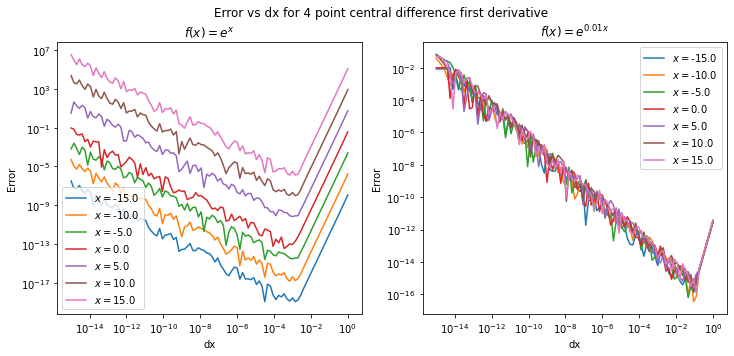

In [63]:
def f1(x):
    return np.exp(x)

def f1_prime(x):
    return np.exp(x)

def f2(x):
    return np.exp(0.01 * x)

def f2_prime(x):
    return 0.01 * np.exp(0.01 * x)


#Points for evaluating the functions and their derivatives
N = 7
x = np.linspace(-15,15,N)


#array for various dx sizes
Ndx = 101
logdx = np.linspace(-15,0,Ndx)
dx = 10**(logdx)
min_dx1 = np.zeros(N)
min_dx2 = np.zeros(N)

#Set-up of a figure for the subplots
fig, axes = plt.subplots(1,2)
ax1 = axes[0]
ax2 = axes[1]
plt.clf()

for i in range(N):
    der_f1_exact = f1_prime(x[i])
    der_f1_num = (f1(x[i] - 2*dx) + 8*f1(x[i] + dx) - 8*f1(x[i] - dx) - f1(x[i]+2*dx))/(12*dx)
    err1 = np.abs(der_f1_num - der_f1_exact)
    der_f2_exact = f2_prime(x[i])
    der_f2_num = (f2(x[i] - 2*dx) + 8*f2(x[i] + dx) - 8*f2(x[i] - dx) - f2(x[i]+2*dx))/(12*dx)
    err2 = np.abs(der_f2_num - der_f2_exact)
    ax1.loglog(dx, err1, label = "$x = ${}".format(x[i]))
    ax2.loglog(dx, err2, label = "$x = ${}".format(x[i]))
    
fig.suptitle("Error vs dx for 4 point central difference first derivative")
ax1.set_title("$f(x) = e^{x}$")
ax1.set_xlabel("dx")
ax1.set_ylabel("Error")
ax2.set_title("$f(x) = e^{0.01x}$")
ax2.set_xlabel("dx")
ax2.set_ylabel("Error")
ax1.legend()
ax2.legend()
plt.show()



Problem 2

I first wrote a function optimal_dx(fun,x) that takes the function and the value of x as arguments and returns the optimal value of dx for computing the derivative. The idea is to find the dx value that minimizes the difference between the function at $x+dx$ and the Taylor approximation:

$ E = | f(x+dx) - f(x) - f'_{\text{numerical}}(x) dx |  = \bigg| f(x) - \frac{(f(x+dx) + f(x-dx))}{2} \bigg|$

In the "minimization", I had to be careful to exclude very small values of dx since the error there is dominated by roundoff and so it is very noisy and can occasionally become very small. I took inspiration from the plots above (and played around with some other functions as well) to see that for large dx, the error is always monotonically increasing. To this end, what optimal_dx() does is it creates an array of various dx sizes, computes the error $E$ given by the formula above for each value of dx and then loops through the error array starting from the largest allowed dx and going backwards to find the point where the error changes from being monotonically increasing to developing a "kink" i.e, when $E(dx_i) - E(dx_{i-1})$ changes sign from positive to negative. I then take the first instance of this sign change as the "optimal" dx, which, as can be seen in the plot below, is a pretty decent estimate.

The function ndiff(fun, x, full=True) then computes the optimal dx value for the input fun and x, calculates the central difference numerical derivative and estimates the error as follows:

$f'_{\text{numerical}}(x) \approx \frac{f(x+dx) - f(x-dx)}{2 dx} \approx \frac{1}{2dx}\bigg([f(x) + f'(x)dx][1+g_+ \epsilon] - [f(x) - f'(x)dx)][1+g_- \epsilon] \bigg) \approx \frac{f(x) [g_+ - g_-] \epsilon}{2dx} + f'(x)$

$\implies \text{error} \approx \bigg| \frac{f(x) [g_+ - g_-] \epsilon}{2dx} \bigg| \approx \bigg| \frac{f(x) \epsilon}{2dx} \bigg|$

with $\epsilon = 10^{-16}$ in this case. Finally, depending on whether full=True or full=False, it returns the derivative, dx and error, or just the derivative, respectively.

As a trial, I use $f(x) = \cos{x}$ and evaluate the derivative at x=1. The plot and the values printed below the code correspond to this test case. As can be seen, the error estimate is also in the correct order of magnitude! (Although I am not fully certain if it would work for, say $\cos{0.01x}$.)

Optimal dx value is  5.3088444423098795e-08
Estimated error is  5.08869973248881e-10
Actual error is  2.5196311703723495e-10


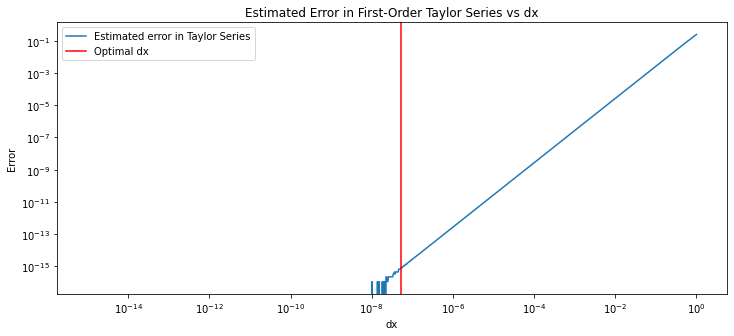

In [112]:
plt.ion()

def optimal_dx(fun,x):
    
    # Set-up array of various dx sizes
    Ndx = 1001
    logdx = np.linspace(-15,0,Ndx)
    dx = 10**(logdx)
    
    # Define the error estimate
    error = np.abs((fun(x+dx) + fun(x-dx))/(2) - fun(x))
    
    # Loop through error array to look for sign change
    for i in range(Ndx):
        if error[Ndx-i-1] - error[Ndx-i-2] < 0:
            index = Ndx-i-2
            break
    
    # Plotting and Printing Results
    plt.loglog(dx, error, label="Estimated error in Taylor Series")
    optimal_dx_value = dx[index]
    plt.axvline(x=optimal_dx_value, c='r', label = "Optimal dx")
    plt.legend()
    plt.title("Estimated Error in First-Order Taylor Series vs dx")
    plt.xlabel("dx")
    plt.ylabel("Error")
    print("Optimal dx value is ", optimal_dx_value)
    
    # Return optimal dx value
    return optimal_dx_value

def ndiff(fun, x, full=False):
    
    # Compute optimal dx value
    dx = optimal_dx(fun,x)
    
    # Compute the central difference derivative
    num_der_fun = (fun(x+dx) - fun(x-dx))/(2*dx)
    
    # Numerical Precision
    epsilon = 1E-16
    
    # Error Estimate from formula given above
    estimated_error = np.abs(fun(x)*epsilon/2/dx)
    
    # Return results based on truth value of "full"
    if full==True:
        return num_der_fun, dx, estimated_error
    elif full==False:
        return num_der_fun


# Test with some function and value of x
fun = np.cos
derivative, dx, error = ndiff(fun, x=1.0, full=True)

# Print Estimated and Actual Errors
print("Estimated error is ", error)
print("Actual error is ", np.abs(-np.sin(1.0) - derivative))

Problem 3